In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sample_submission = pd.read_csv('./data/sample_submission_V2.csv')
train = pd.read_csv('./data/train_V2.csv')
test = pd.read_csv('./data/test_V2.csv')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

|datafield|설명|
|-------|--------|
|Id	|플레이어 ID|
|groupId|	매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨|
|matchId|	매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음)|
|assists|	아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)|
|boosts|부스트 아이템 사용 횟수|
|damageDealt|	총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)|
|DBNOs(Down But Not Out)|	적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수|
|headshotKills|	헤드샷 킬 수|
|heals|	힐링 아이템 사용 횟수|
|killPlace|	매치에서의 킬 횟수 순위|
|killPoints|	킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.|
|kills	|총 킬 수|
|killStreaks|	짧은 시간동안 최대한 많이 킬했을 때의 킬 수|
|longestKill	|킬과 킬 사이의 이동한 가장 긴 거리|
|matchDuration|	매치의 시간 (초 단위)|
|matchType|	매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치|
|maxPlace	|매치 내에서 최악의 등수|
|numGroups|	게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)|
|rankPoints|	랭킹 ELO의 개념|
|revives|	아군 부활 횟수|
|rideDistance	|탈것으로 이동한 총 거리|
|roadKills|	탈것으로 킬한 횟수|
|swimDistance	|수영한 총 거리|
|teamKills|	팀킬 횟수|
|vehicleDestroys|	차량 폭파 횟수|
|walkDistance|	걸어간 총 거리|
|weaponsAcquired|	얻은 무기의 수|
|winPoints|	승리 횟수로 판단한 ELO의 개념|
|**winPlacePerc**	|예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)|


In [28]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [29]:
#winPlacePerc가 누락된 데이터 1개 제거
train = train.dropna(subset=['winPlacePerc'])
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [30]:
#id는 승률에 영향을 끼치지 않으므로 제거
train = train.drop(['Id','groupId','matchId'],axis=1)
test = test.drop(['Id','groupId','matchId'],axis=1)

In [31]:
sample_submission.isna().sum()

Id              0
winPlacePerc    0
dtype: int64

In [32]:
test.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [ ]:
#변수 분류하기
#binary


#category
matchType,numGroups

#numeric
assists, boosts, dammageDealt, headshotKills,heals, killPlace,killPoints,kills
killStreaks, longestKill ,matchDuration ,rankPoints,revives,rideDistance,roadKills
swimDistance,teamKills,vehicleDestroys,walkDistance, weaponsAcquired,winPoints
winPlacePerc

In [41]:
pd.set_option('display.max_columns',None)
train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


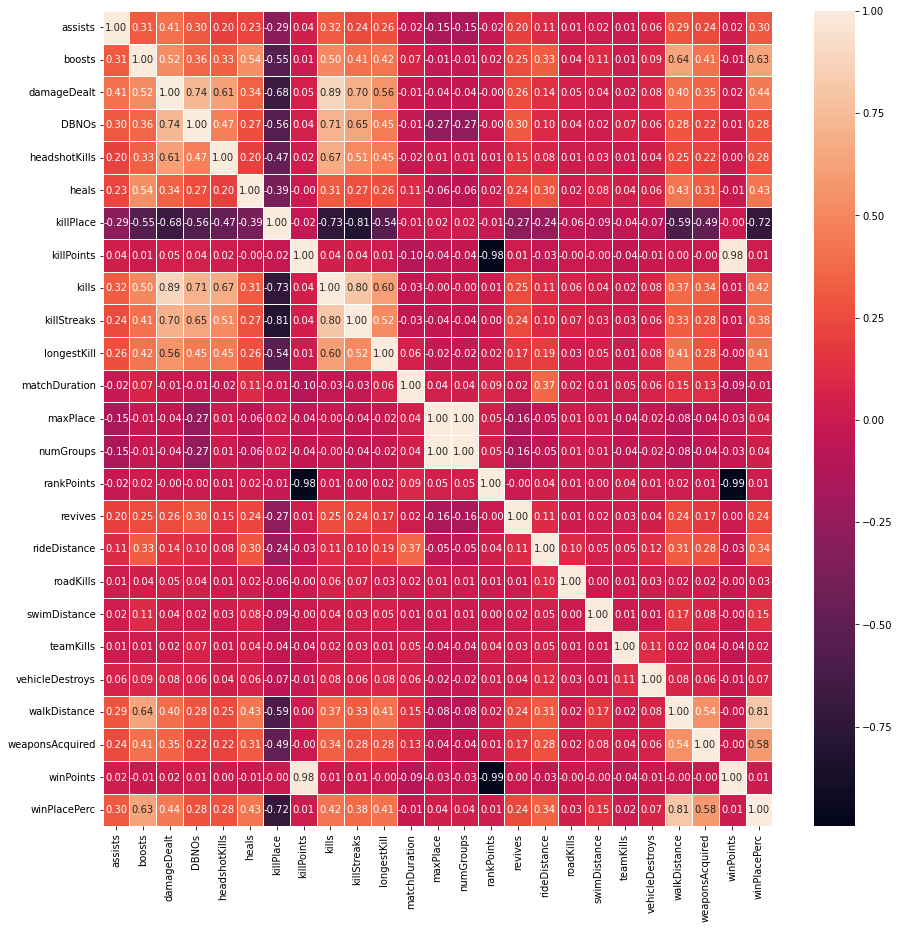

In [34]:
fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

killPoint, winPoint <- 거의 유사 , rankPoint와는 거의 정반대
maxPlace, numGroups 완전 같음

In [35]:
#maxPlace와 numGroups는 같으므로 maxPlace 제거
train = train.drop(['maxPlace'],axis=1)
test = test.drop(['maxPlace'],axis=1)

In [36]:
a = pd.get_dummies(train['matchType'])
a.value_counts().to_frame()

0
crashfpp crashtpp duo duo-fpp flarefpp flaretpp normal-duo normal-duo-fpp normal-solo normal-solo-fpp normal-squad normal-squad-fpp solo solo-fpp squad squad-fpp         
0        0        0   0       0        0        0          0              0           0               0            0                0    0        0     1          1756186
                      1       0        0        0          0              0           0               0            0                0    0        0     0           996691
                      0       0        0        0          0              0           0               0            0                0    0        1     0           626526
                                                                                                                                         1        0     0           536761
                  1   0       0        0        0          0              0           0               0            0                0    0        0     0           313591
                  0   0       0        0        0          0              0           0               0            0                1    0        0     0           181943
                                                                                                                   1                0    0        0     0            17174
1        0        0   0       0        0        0          0              0           0               0            0                0    0        0     0             6287
0        0        0   0       0        0        0          1              0           0               0            0                0    0        0     0             5489
                                       1        0          0              0           0               0            0                0    0        0     0             2505
                                       0        0          0              0           1               0            0                0    0        0     0             1682
                              1        0        0          0              0           0               0            0                0    0        0     0              718
                              0        0        0          0              0           0               1            0                0    0        0     0              516
         1        0   0       0        0        0          0              0           0               0            0                0    0        0     0              371
         0        0   0       0        0        0          0              1           0               0            0                0    0        0     0              326
                                                1          0              0           0               0            0                0    0        0     0              199

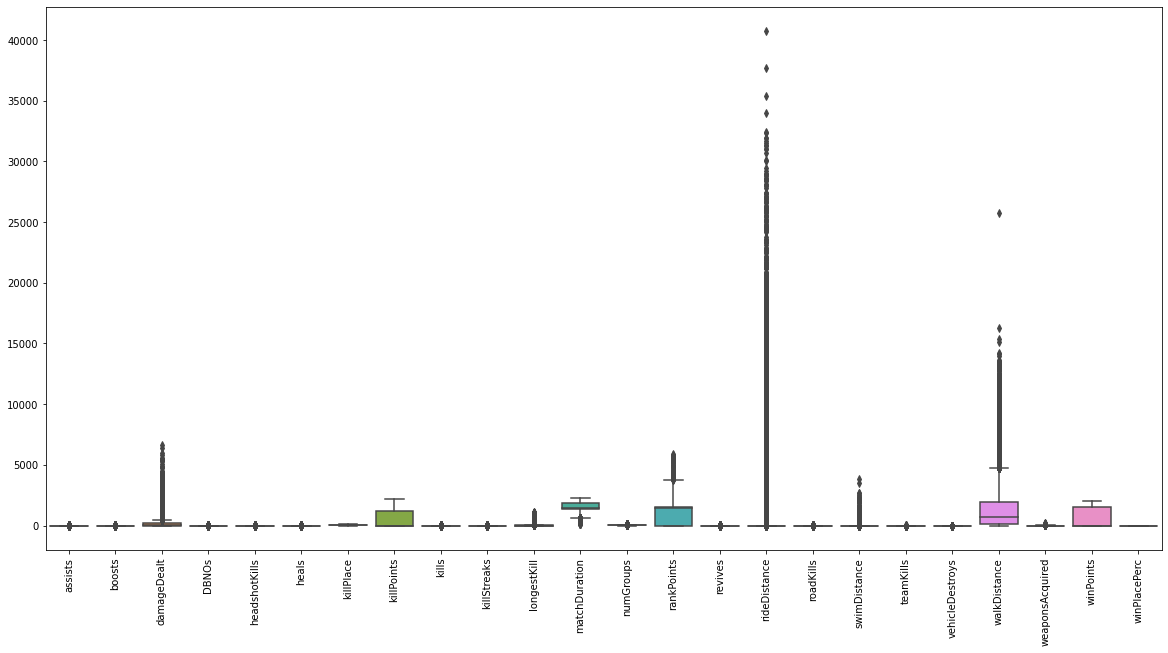

In [67]:
#박스플롯으로 전체적인 데이터 분석
fig,ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = train)
plt.xticks(rotation=90)
plt.show()

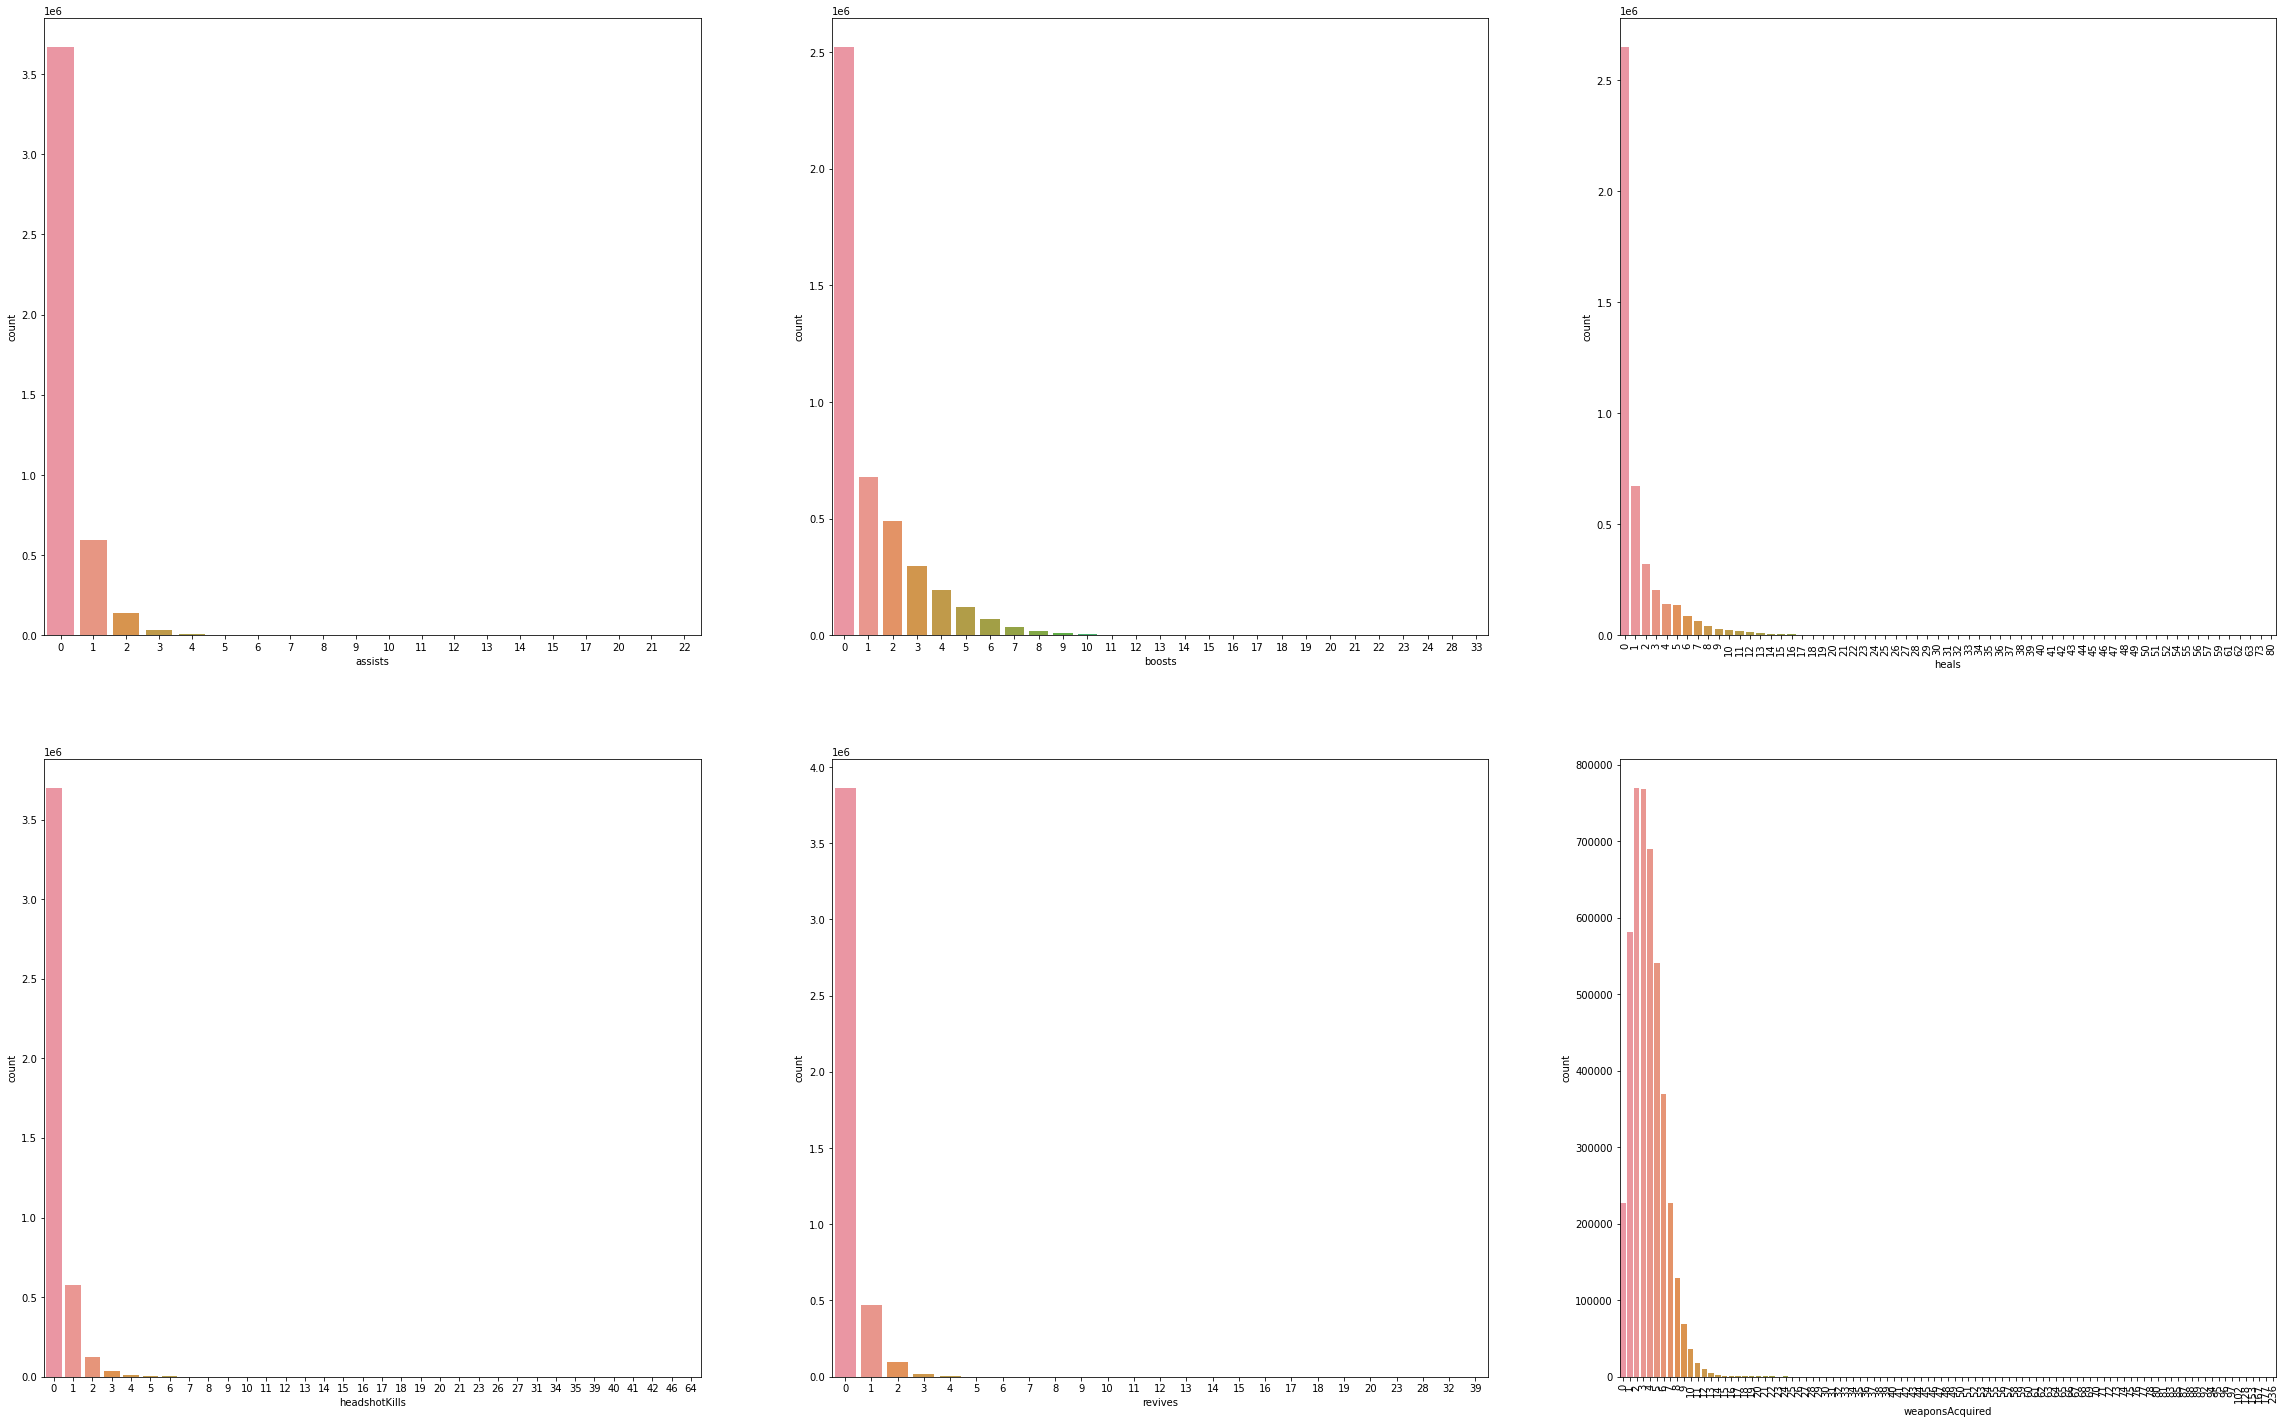

In [101]:
#데이터 분포 확인
plt.figure(figsize=(40,25))

plt.subplot(2,3,1)
sns.countplot(data = train, x = 'assists')

plt.subplot(2,3,2)
sns.countplot(data = train, x = 'boosts')

plt.subplot(2,3,3)
sns.countplot(data = train, x = 'heals')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(data = train, x = 'headshotKills')

plt.subplot(2,3,5)
sns.countplot(data = train, x = 'revives')

plt.subplot(2,3,6)
sns.countplot(data = train, x = 'weaponsAcquired')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#이상치 찾기

sns.distplot(x = train['walkDistance'], hist =True, kde = False, rug = True, bins = 20)

In [ ]:
#피쳐 간 상관관계 분석
    
    

In [ ]:
#변수 재분류 및 병합(boost + heal , 이동거리 모두 합치기)



In [ ]:
X = train.drop('winPlacePerc',axis=1)
y = train['winPlacePerc']

In [ ]:
model = LGBMRegressor()
model.fit(X,y)
pred = model.predict(test)